In [1]:
import yfinance as yf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

df = pd.read_csv("../data/AAPL.csv", index_col=0, parse_dates=True)
df['Return'] = df['Close'].pct_change()
print(df.head())

                 Open       High        Low      Close     Volume    Return
Date                                                                       
2020-01-02  71.409785  72.460784  71.156682  72.400520  135480400       NaN
2020-01-03  71.629138  72.455950  71.472454  71.696632  146322800 -0.009722
2020-01-06  70.819208  72.306506  70.568510  72.267937  118387200  0.007968
2020-01-07  72.277571  72.533087  71.708687  71.928047  108872000 -0.004703
2020-01-08  71.631552  73.386423  71.631552  73.085106  132079200  0.016086


In [8]:
df["Close"].pct_change(periods=2)

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.001831
2020-01-07    0.003228
2020-01-08    0.011307
                ...   
2020-12-22    0.041213
2020-12-23    0.021290
2020-12-24    0.000682
2020-12-28    0.043754
2020-12-29    0.021975
Name: Close, Length: 251, dtype: float64

In [2]:
# Option 1 of adding the rolling mean and standard deviation features

df["rolling_mean"] = df["Return"].rolling(window=3).mean()
df["rolling_std"] = df["Return"].rolling(window=3).std()

In [14]:
# Option 2 of adding the rolling mean and standard devaition features that allows the window size to be easily changed

def add_rolling_features(df, window):
    df["rolling_mean"] = df["Return"].rolling(window).mean()
    df["rolling_std"] = df["Return"].rolling(window).std()
    return df

df = add_rolling_features(df, window=20)


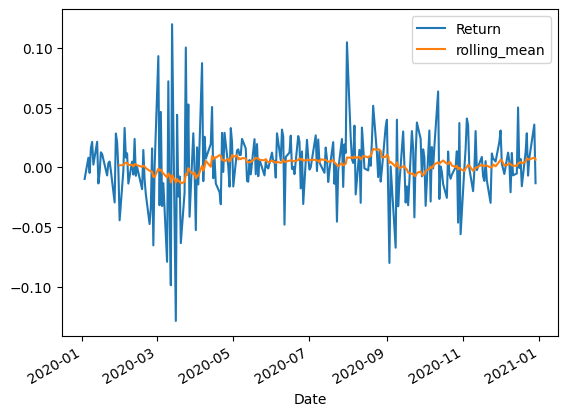

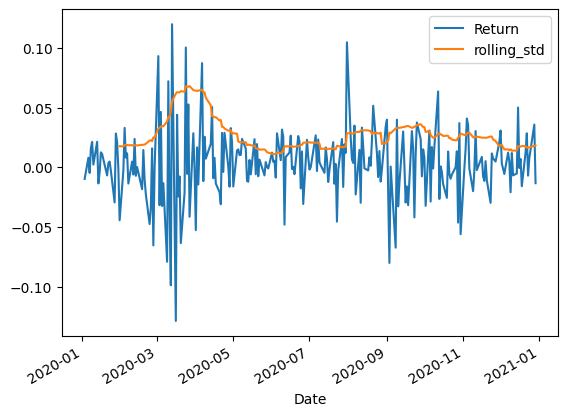

In [7]:
df[["Return", "rolling_mean"]].plot()
plt.show()
df[["Return", "rolling_std"]].plot()
plt.show()

In [27]:
import yfinance as yf
import pandas as pd
from pathlib import Path


def download_stock_data(
    ticker: str, start: str, end: str, should_save: bool = True, path: str = "../data"
) -> pd.DataFrame:
    """
    This kickass function is going to get stock data from yfinance and return a cleaned DataFrame.
    """
    df = yf.download(ticker, start=start, end=end)
    df.columns = df.columns.droplevel("Ticker")  # if the level is named
    df = df[["Open", "High", "Low", "Close", "Volume"]]
    df = df.sort_index()
    print(f"Data fetched successfully for ticker {ticker} from {start} to {end}.")
    # Create a directory to save data if it doesn't exist
    Path(path).mkdir(parents=True, exist_ok=True)
    if (should_save):
        print(f"Saving data to {path}/{ticker}.csv")
        # Save the data to a CSV file
        df.to_csv(f"{path}/{ticker}.csv")
        print(f"data saved to {path}/{ticker}.csv")
        # return df

In [28]:
def load_stock_data(ticker: str, path: str = '../data') -> pd.DataFrame:
    print(f"loading stock data from {path}/{ticker}.csv")
    df = pd.read_csv(f"{path}/{ticker}.csv", index_col=0, parse_dates=True)
    return df

In [26]:
ticker = 'AAPL'
df = load_stock_data(ticker)

loading stock data from ../data/AAPL.csv


# Our first module

yippeee

In [3]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))


from quantix.data import download_stock_data, load_stock_data

In [4]:
ticker = "AAPL"
start = "2020-01-01"
end = "2023-01-01"
download_stock_data(ticker, start, end)

[*********************100%***********************]  1 of 1 completed

Data fetched successfully for ticker AAPL from 2020-01-01 to 2023-01-01.
Saving data to ../data/AAPL.csv
data saved to ../data/AAPL.csv


Wouldnt it be cool, if i had a broker, where i could just tell him the stock I want to look at once. and then he could do all sorts of analysis with it without me having to remind him all the time.

thats where classes come in 
meet **StockBroker class**

who also happens to have some strategies built in

